## MachineLearningEngine Class

The MachineLearningEngine class is builds on the CoreEngine class. The CoreEngine class serves as a parent class engines that focus on data, while the MachineLearningEngine class is for engines that focus on learning from data.

In [ ]:
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine

#Creates an empty MachineLearningEngine object and prints it
engine = MachineLearningEngine()
engine.print()

## MachineLearningAnalysis Class

The MachineLearningAnalysis class is builds on the class Analysis. The Analysis class that is used to perform analysis on the data. 

In [ ]:
from src.StreamPort.ml.MachineLearningAnalysis import MachineLearningAnalysis

#Creates an empty MachineLearningAnalysis obejct and prints it
analysis = MachineLearningAnalysis()
analysis.print()

## Read the CSV File  

This method is used for the reading the data from the csv file. 

In [ ]:
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt

#Creates an empty MachineLearningEngine object and prints it
path = 'feature_list.csv'
engine = MachineLearningEngine()
engine.add_analyses_from_csv(path)

engine.print()

print("Create a list of analysis object and prints it" )
for analysis in engine._analyses:
    print(f"Analysis: {analysis.name}")
    for key, value in analysis.data.items():
        print(f"{key}: {value}")
    print("\n")

rownames = engine.get_analyses_names()
print("Analysename: ", rownames)

mat = engine.get_data()
mat.index = rownames
print("Matrix: \n", mat)

# Use the matrix mat to perform a Principle Components Analysis (PCA) and plot the scores
# the labels of the matrix should be the cols as x and row names as analyses names

pca = PCA(n_components=2)
scores = pca.fit_transform(mat)

plt.scatter(scores[:, 0], scores[:, 1])

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA Scores")
plt.show()


# Make a ProcessingSettings child with PCA method and create a results object to hold the PCA results
    #MakePCA(ProcessingSettings) the second MakePCASKL(MakePCA)
# Add the ProcessingSettings to the _settings attribute with add settings
# Create a method in the ML engine to perfom PCA and collect the results
# The results are added to the _results atribute of the engine
# make a plot method in the ML engine for the PCA results and classes
# Add the ProcessingSettings to the _settings attribute with add settings



MakePCA of ProcessingSettings child

Structure of the CSV file: {'number_of_rows': 45, 'number_of_columns': 4445}
Structure of the CSV file: {'number_of_rows': 45, 'number_of_columns': 2}

MachineLearningEngine 
  name: None 
  author: None 
  path: None 
  date: 2024-06-05 23:16:51.308598 
  analyses: 45 
  settings: 0 



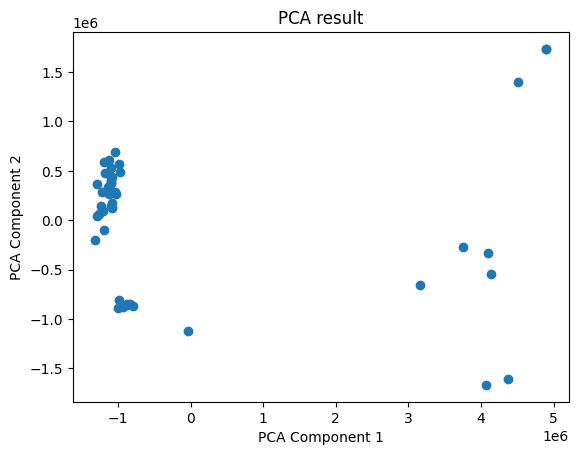

In [1]:
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine
from src.StreamPort.core.ProcessingSettings import ProcessingSettings
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt


#Creates an empty MachineLearningEngine object and prints it
path = 'feature_list.csv'
engine = MachineLearningEngine()
engine.add_analyses_from_csv(path)

class_path = 'feature_metadata.csv'
engine.add_classes_from_csv(class_path)

engine.print()

# Make a ProcessingSettings child with PCA method and create a results object to hold the PCA results
    #MakePCA(ProcessingSettings) the second MakePCASKL(MakePCA)

class MakePCA(ProcessingSettings):
    def __init__(self, call, algorithm, parameters, version, software, developer, contact, link, doi):
        super().__init__(call, algorithm, parameters, version, software, developer, contact, link, doi)
        
    def run(self):
        pass

class MakePCASKL(MakePCA):
    def __init__(self, n_components = 2):
        call="MakePCA"
        algorithm="PCA"
        parameters={
            "n_components": n_components
        }
        version="1.4.2"
        software="sklearn"
        developer=None
        contact=None
        link=None
        doi=None
        super().__init__(call, algorithm, parameters, version, software, developer, contact, link, doi)

    def run(self, engine):
        data = engine.get_data()
        pca = PCA(n_components=2) 
        pca_results = pca.fit_transform(data)
        return pca_results

# Add the ProcessingSettings to the _settings attribute with add settings
settingsSKL = MakePCASKL(n_components = 4)
engine.add_settings(settingsSKL)

# Create a method in the ML engine to perfom PCA and collect the results
engine.make_pca()
# The results are added to the _results atribute of the engine
# make a plot method in the ML engine for the PCA results and classes
engine.plot_pca()
# Add the ProcessingSettings to the _settings attribute with add settings



